In [1]:
import pandas as pd
import pyarrow.parquet as pq
from matplotlib import pyplot as plt
import os
from pathlib import Path
import shutil

In [2]:
rootdir_prod_ia = '../hectare_data/heatlive_allaitant_prod_ia/normalized/'
df = pd.DataFrame()
for subdir, dirs, files in os.walk(rootdir_prod_ia):
    for file in files:
        ax_tab = pd.read_parquet('../hectare_data/heatlive_allaitant_prod_ia/ax_raw/' + os.path.join(file))
        nr_tab = pd.read_parquet('../hectare_data/heatlive_allaitant_prod_ia/normalized/' + os.path.join(file))
        ax_tab['COW_ID'] = str(os.path.join(file)[0:12])
        ax_tab.index = pd.to_datetime(ax_tab.index).floor('5T')
        df = df.append(ax_tab.merge(nr_tab, left_index=True, right_index=True))

In [3]:
rootdir_ms = '../hectare_data/heatlive_allaitant_ms/normalized/'
for subdir, dirs, files in os.walk(rootdir_ms):
    for file in files:
        ax_tab = pd.read_parquet('../hectare_data/heatlive_allaitant_ms/ax_raw/' + os.path.join(file))
        nr_tab = pd.read_parquet('../hectare_data/heatlive_allaitant_ms/normalized/' + os.path.join(file))
        ax_tab['COW_ID'] = str(os.path.join(file)[0:12])
        ax_tab.index = pd.to_datetime(ax_tab.index).floor('5T')
        df = df.append(ax_tab.merge(nr_tab, left_index=True, right_index=True))

In [4]:
rootdir_ms_utc = '../hectare_data/libvel_laitier_ms_utc/normalized/'
for subdir, dirs, files in os.walk(rootdir_ms_utc):
    for file in files:
        ax_tab = pd.read_parquet('../hectare_data/libvel_laitier_ms_utc/ax_raw/' + os.path.join(file))
        nr_tab = pd.read_parquet('../hectare_data/libvel_laitier_ms_utc/normalized/' + os.path.join(file))
        ax_tab['COW_ID'] = str(os.path.join(file)[0:12])
        ax_tab.index = pd.to_datetime(ax_tab.index).floor('5T')
        df = df.append(ax_tab.merge(nr_tab, left_index=True, right_index=True))

In [5]:
rootdir_prod_tvax = '../hectare_data/libvel_laitier_prod_tvax/normalized/'
for subdir, dirs, files in os.walk(rootdir_prod_tvax):
    for file in files:
        ax_tab = pd.read_parquet('../hectare_data/libvel_laitier_prod_tvax/ax_raw/' + os.path.join(file))
        nr_tab = pd.read_parquet('../hectare_data/libvel_laitier_prod_tvax/normalized/' + os.path.join(file))
        ax_tab['COW_ID'] = str(os.path.join(file)[0:12])
        ax_tab.index = pd.to_datetime(ax_tab.index).floor('5T')
        df = df.append(ax_tab.merge(nr_tab, left_index=True, right_index=True))

In [6]:
if os.path.isfile('~/Desktop/Agritech/Meuh/hectare_data/all_file.csv'):
    os.remove('~/Desktop/Agritech/Meuh/hectare_data/all_file.csv')
df.to_csv('~/Desktop/Agritech/Meuh/hectare_data/all_file.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/agritech/Desktop/Agritech/Meuh/hectare_data/all_file.csv'

In [ ]:
df['Ingestion'] = df['Ingestion_at_pasture'] + df['Ingestion_at_trough']
#df['Ingestion'] = 1 * df['Ingestion_at_pasture'] + 1 * df['Ingestion_at_trough']
df['Ingestion'].mean()


0.1928870129262346

In [ ]:
df

,ChAg,ChAn,Chgx,EAg,EAn,Egx,EtAg,Etgx,P0An,COW_ID,Rumination,Rest,OverActivity,Ingestion_at_trough,Ingestion_at_pasture,OtherActivity,Up,Ingestion
#YYYY-MM-DD HH:MM:SS,,,,,,,,,,,,,,,,,,
2018-09-19 00:00:00,0.0,0.00,39.0,0.0,0.0,2.0,0.00000,54.6,0.00000,FR4973400320,False,True,False,False,False,False,False,False
2018-09-19 00:05:00,4.0,4.00,40.0,1.5,1.0,0.0,1.00000,44.0,0.00000,FR4973400320,False,True,False,False,False,False,False,False
2018-09-19 00:10:00,4.0,4.75,2.0,1.5,1.0,-10.0,1.00000,3.0,0.00000,FR4973400320,False,True,False,False,False,False,False,False
2018-09-19 00:15:00,38.0,40.00,48.0,8.0,10.0,-1.0,10.00000,28.8,9.60000,FR4973400320,False,True,False,False,False,False,False,False
2018-09-19 00:20:00,19.2,45.00,10.0,4.8,12.0,-9.0,8.57143,9.0,15.00000,FR4973400320,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-29 04:30:00,0.0,0.00,7.0,0.0,0.0,2.0,0.00000,7.7,0.00000,FR0200971363,True,False,False,False,False,False,False,False
2015-08-29 04:35:00,32.0,45.00,44.0,8.0,20.0,-10.0,8.57143,30.8,4.26667,FR0200971363,True,False,False,False,False,False,False,False
2015-08-29 04:40:00,21.6,42.75,8.0,3.6,9.0,-11.0,1.28571,12.0,24.06670,FR0200971363,True,False,False,False,False,False,False,False


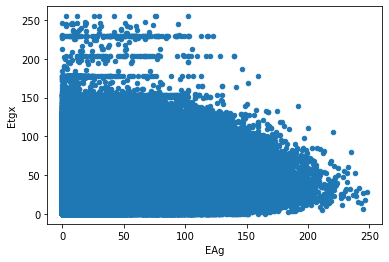

In [ ]:
df.plot(x="EAg", y="Etgx", kind="scatter")
plt.show()

In [ ]:

df["Rumination"] = 1 * df["Rumination"]
df["Rest"] = 1 * df["Rest"]
df["OverActivity"] = 1 * df["OverActivity"]
df["Ingestion_at_trough"] = 1 * df["Ingestion_at_trough"]
df["Ingestion_at_pasture"] = 1 * df["Ingestion_at_pasture"]
df["Ingestion"] = 1 * df["Ingestion"]
df["OtherActivity"] = 1 * df["OtherActivity"]
df["Up"] = 1 * df["Up"]

print(df)

                      ChAg   ChAn  Chgx  EAg   EAn   Egx      EtAg  Etgx  \
#YYYY-MM-DD HH:MM:SS                                                       
2018-09-19 00:00:00    0.0   0.00  39.0  0.0   0.0   2.0   0.00000  54.6   
2018-09-19 00:05:00    4.0   4.00  40.0  1.5   1.0   0.0   1.00000  44.0   
2018-09-19 00:10:00    4.0   4.75   2.0  1.5   1.0 -10.0   1.00000   3.0   
2018-09-19 00:15:00   38.0  40.00  48.0  8.0  10.0  -1.0  10.00000  28.8   
2018-09-19 00:20:00   19.2  45.00  10.0  4.8  12.0  -9.0   8.57143   9.0   
...                    ...    ...   ...  ...   ...   ...       ...   ...   
2015-08-29 04:30:00    0.0   0.00   7.0  0.0   0.0   2.0   0.00000   7.7   
2015-08-29 04:35:00   32.0  45.00  44.0  8.0  20.0 -10.0   8.57143  30.8   
2015-08-29 04:40:00   21.6  42.75   8.0  3.6   9.0 -11.0   1.28571  12.0   
2015-08-29 04:45:00   22.4  72.00   2.0  3.2  16.0 -14.0   0.00000   3.0   
2015-08-29 04:50:00   30.8  66.50   3.0  7.0  14.0 -14.0   6.00000   4.5   

           

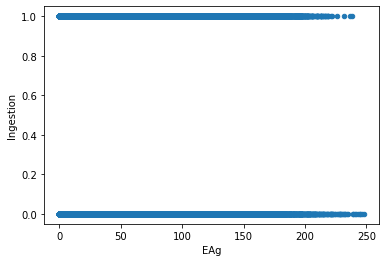

In [ ]:
df.plot(x="EAg", y="Ingestion", kind="scatter")
plt.show()

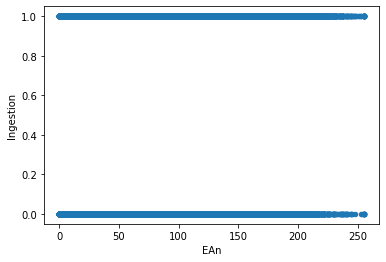

In [ ]:
df.plot(x="EAn", y="Ingestion", kind="scatter")
plt.show()

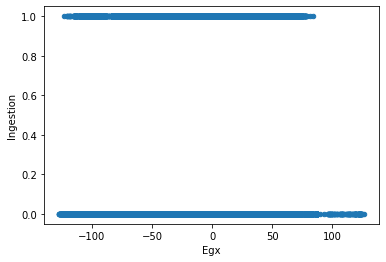

In [ ]:
df.plot(x="Egx", y="Ingestion", kind="scatter")
plt.show()

In [ ]:
import seaborn as sns

sns.kdeplot(data=df, x="Egx")


In [ ]:
# sns.kdeplot(data=df.loc[df.Ingestion==0], x="Egx")
# sns.kdeplot(data=df.loc[df.Ingestion==1], x="Egx")
sns.kdeplot(data=df.dropna(subset=['Egx', 'Ingestion']), x="Egx", heu="Ingestion")

In [ ]:
sns.kdeplot(data=df.dropna(subset=['EAn', 'Ingestion']), x="Egx", heu="Ingestion")

In [ ]:
sns.kdeplot(data=df.dropna(subset=['EAg', 'Ingestion']), x="Egx", heu="Ingestion")

In [ ]:
sns.kdeplot(data=df.dropna(subset=['P0An', 'Ingestion']), x="P0An", heu="Ingestion")